In [1]:
from functools import partial
from pathlib import Path

from matplotlib.pyplot import plot
from torch import Generator, tensor, use_deterministic_algorithms

from karpathy_series.makemore.bigrams import NGram
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.encoding.character import CharacterEncoder, CharacterSet, StringEncoder
from karpathy_series.makemore.models.generation import NGramNetGenerator
from karpathy_series.makemore.models.mlp import MPLNet
from karpathy_series.makemore.training.data import TrainingSequencer
from karpathy_series.makemore.training.learning import Learner

%matplotlib inline
use_deterministic_algorithms(True)
rand_generator = Generator()
seed = 2147483647


def create_generator():
    return rand_generator.manual_seed(seed)

In [2]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
string_encoder = StringEncoder(char_encoder)

context_size = 4
n_gram_gen = partial(NGram.generate, context_size, char_set.pad)
ts = TrainingSequencer(string_encoder, char_encoder, n_gram_gen)

embedding_dims = 10
hidden_dims = 200

In [3]:
import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

xis_d, yis_d = ts.training_set(words[n1:n2])
xis_v, yis_v = ts.training_set(words[n2:])

learning_sequence = ts.training_sequence(words[:n1], 32, True)

In [4]:
g = rand_generator.manual_seed(seed)
mpl_net = MPLNet.init_normalized_from_size(char_encoder.size, context_size, embedding_dims, hidden_dims, generator=g)
generator = NGramNetGenerator(char_set, string_encoder, char_encoder, mpl_net)
losses = []

In [11]:
learner = Learner(mpl_net, 0.01)
losses += learner(learning_sequence, epochs=50, report_epochs=10)

Epoch 10 is finished with loss = 1.9420692920684814
Epoch 20 is finished with loss = 2.002310037612915
Epoch 30 is finished with loss = 1.8482346534729004
Epoch 40 is finished with loss = 1.8766354322433472
Epoch 50 is finished with loss = 1.9045977592468262


In [12]:
print(mpl_net.run(xis_v, yis_v))

tensor(2.0630, grad_fn=<NllLossBackward0>)


In [13]:
for k in range(20):
    print(generator())

rayaciaha
nula
anah
kaslawoyan
fyan
ley
jahmir
vilte
bran
jacqubelle
ster
land
johnniah
dahana
shana
dimit
dhennika
kemferchere
mani
trucia


In [6]:
generator.forward(".joh")

'l'

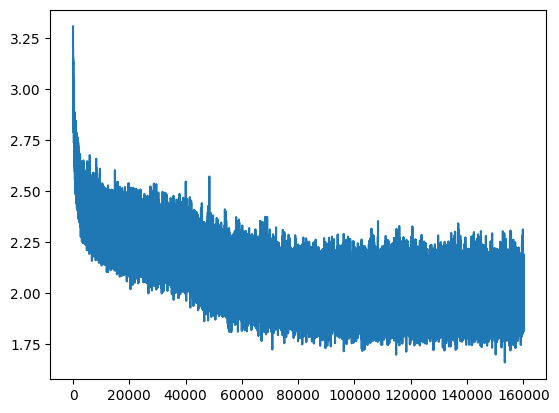

In [14]:
plot(tensor(losses))